<a href="https://colab.research.google.com/github/MiekeNap/DataAnalytics_FinalAssignment/blob/main/Final_Assignment_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 2


**Which countries are making the biggest strides in decreasing CO2 output?**

You'll need to find the relative CO2 output for each country to be able to calculate this. But countries can have growing and shrinking populations too, so it's probably a good idea to take this into account as well.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly

import matplotlib.font_manager
%matplotlib inline
from matplotlib.pyplot import figure
import plotly.express as px 
from scipy import stats

%load_ext google.colab.data_table

# Preparing data set

In [ ]:
df_data = pd.read_csv("https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv", encoding = 'cp1252')
df_data.head()
df_data.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [ ]:
# Only keep the relevant columns
df_co2 = df_data[['country', 'year', 'co2_per_capita']]
df_co2_clean = df_co2.dropna()
df_co2_clean

,country,year,co2_per_capita
99,Afghanistan,1949,0.002
100,Afghanistan,1950,0.011
101,Afghanistan,1951,0.012
102,Afghanistan,1952,0.012
103,Afghanistan,1953,0.014
...,...,...,...
46518,Zimbabwe,2017,0.651
46519,Zimbabwe,2018,0.784
46520,Zimbabwe,2019,0.724
46521,Zimbabwe,2020,0.677


In [ ]:
# Remove rows that are not countries
df_co2_clean_country = df_co2_clean[~df_co2_clean.isin(['Africa', 'Asia', 'Asia (excl. China and India)', 'Europe (excl. EU-27)', 'Europe (excl. EU-28)',
       'European Union (27)', 'European Union (28)','Low-income countries', 'Lower-middle-income countries','North America',
       'North America (excl. USA)','South America','Oceania', 'Upper-middle-income countries', 'World']).any(axis=1)]
df_co2_clean_country.country.unique()                         

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Europe', 'Faeroe Islands', '

In [ ]:
# To decide which countries made biggest relative change, I selected the maximum emission/capita as reference point. 
# I took the last datapoint per country divided by max * 100 to find the relative change.
# sorting the table on these changes gives the top countries (the countries with lowest percentage compared to the max will be at the top).

df_co2_max = df_co2_clean_country.groupby('country').apply(lambda x: x.loc[x.co2_per_capita.idxmax(), ['year', 'co2_per_capita']])
df_co2_max

,year,co2_per_capita
country,,
Afghanistan,2011,0.405
Albania,1989,2.738
Algeria,2019,4.203
Andorra,2000,7.925
Angola,2011,1.250
...,...,...
Vietnam,2019,3.560
Wallis and Futuna,2021,2.387
Yemen,1968,1.786


In [ ]:
# The first time i looked at full history, but there appeared to be some outliers, giving false results, 
# so I repeated with data from the last ~30 years
df_co2_clean_recent = df_co2_clean_country.loc[df_co2_clean_country.year > 1989]
df_co2_clean_recent.head()

,country,year,co2_per_capita
140,Afghanistan,1990,0.189
141,Afghanistan,1991,0.178
142,Afghanistan,1992,0.123
143,Afghanistan,1993,0.106
144,Afghanistan,1994,0.094


In [ ]:
# Selecting maxium CO2 output from last ~30 years instead of full history
df_co2_max_recent = df_co2_clean_recent.groupby('country').apply(lambda x: x.loc[x.co2_per_capita.idxmax(), ['year', 'co2_per_capita']])
df_co2_max_recent

,year,co2_per_capita
country,,
Afghanistan,2011,0.405
Albania,2014,2.080
Algeria,2019,4.203
Andorra,2000,7.925
Angola,2011,1.250
...,...,...
Vietnam,2019,3.560
Wallis and Futuna,2021,2.387
Yemen,2009,1.009


In [ ]:
df_co2_max_total = pd.merge(df_co2_clean_recent, df_co2_max_recent, on='country')
df_co2_max_total
df_co2_max_total.drop(columns='year_y', inplace=True)
df_co2_max_total.columns = ['country', 'year', 'co2_per_capita', 'co2_per_capita_max']
df_co2_max_total

,country,year,co2_per_capita,co2_per_capita_max
0,Afghanistan,1990,0.189,0.405
1,Afghanistan,1991,0.178,0.405
2,Afghanistan,1992,0.123,0.405
3,Afghanistan,1993,0.106,0.405
4,Afghanistan,1994,0.094,0.405
...,...,...,...,...
7031,Zimbabwe,2017,0.651,1.602
7032,Zimbabwe,2018,0.784,1.602
7033,Zimbabwe,2019,0.724,1.602
7034,Zimbabwe,2020,0.677,1.602


In [ ]:
# check which year is the most recent year
df_co2_max_total.year.max()

2021

In [ ]:
# only keep the rows of year 2021
df_co2_2021 = df_co2_max_total.loc[df_co2_max_total.year == 2021]
df_co2_2021

# dropping rows with CO2 emission lower than the mean, to avoid obscure data by calculating with very small numbers
# df_co2_2021.co2_per_capita_max.mean() # result = 14
df_co2_2021_high = df_co2_2021.loc[df_co2_2021.co2_per_capita_max > 14]
df_co2_2021_high

,country,year,co2_per_capita,co2_per_capita_max
319,Aruba,2021,8.054,29.146
351,Australia,2021,15.091,19.213
479,Bahrain,2021,26.664,27.311
959,Brunei,2021,23.532,23.941
1151,Canada,2021,14.300,18.469
1599,Curacao,2021,9.686,40.834
1663,Czechia,2021,9.242,15.941
1727,Denmark,2021,5.052,14.244
2013,Estonia,2021,7.864,23.507
2141,Faeroe Islands,2021,13.198,16.471


In [ ]:
df_co2_relative = df_co2_2021_high
df_co2_relative['co2_relative'] = round(df_co2_2021_high.loc[:, 'co2_per_capita'] / df_co2_2021_high.loc[:, 'co2_per_capita_max'] * 100)
df_co2_relative

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country,year,co2_per_capita,co2_per_capita_max,co2_relative
319,Aruba,2021,8.054,29.146,28.0
351,Australia,2021,15.091,19.213,79.0
479,Bahrain,2021,26.664,27.311,98.0
959,Brunei,2021,23.532,23.941,98.0
1151,Canada,2021,14.300,18.469,77.0
1599,Curacao,2021,9.686,40.834,24.0
1663,Czechia,2021,9.242,15.941,58.0
1727,Denmark,2021,5.052,14.244,35.0
2013,Estonia,2021,7.864,23.507,33.0
2141,Faeroe Islands,2021,13.198,16.471,80.0


# Results of top performing countries

In [ ]:
df_top_five = df_co2_relative.sort_values(by='co2_relative').iloc[:6]
df_top_five

,country,year,co2_per_capita,co2_per_capita_max,co2_relative
3371,Kuwait,2021,24.972,367.928,7.0
1599,Curacao,2021,9.686,40.834,24.0
319,Aruba,2021,8.054,29.146,28.0
5703,Singapore,2021,5.472,17.474,31.0
2013,Estonia,2021,7.864,23.507,33.0
1727,Denmark,2021,5.052,14.244,35.0


In [ ]:
# plotting the top five countries  in individual graphs 
def show_co2_changes(df, country):
    df = df.loc[df['country'] == country]

    df.plot(title=f'CO2 changes in {country}', x='year', grid=True)

In [ ]:
df_top_five.country.unique()

array(['Kuwait', 'Curacao', 'Aruba', 'Singapore', 'Estonia', 'Denmark'],
      dtype=object)

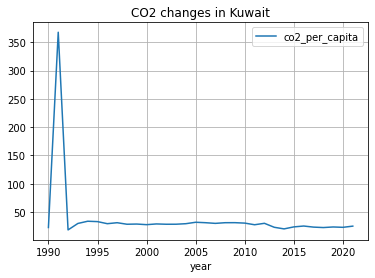

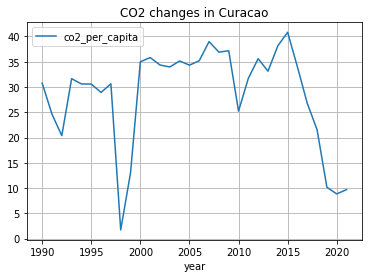

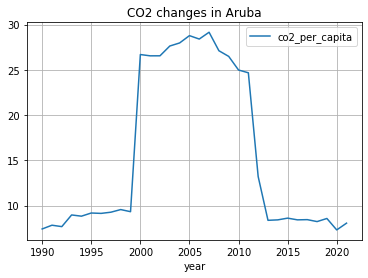

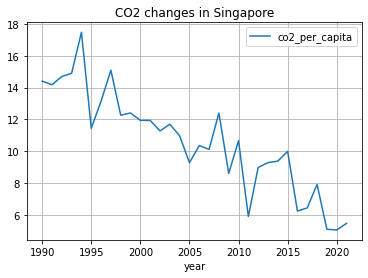

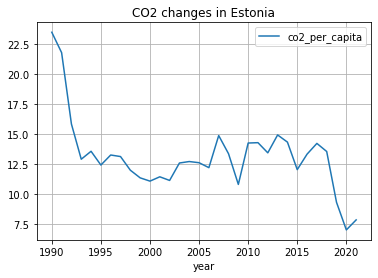

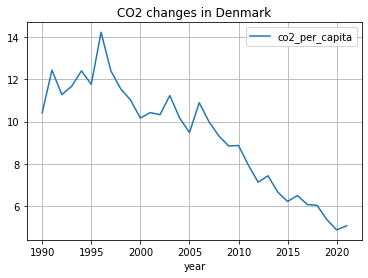

In [ ]:
# plotting the top five countries   
show_co2_changes(df_co2_clean_recent, 'Kuwait'), #Kuwait seems to have a high outlier aroud 1991, so I have excluded this from the list
show_co2_changes(df_co2_clean_recent, 'Curacao')
show_co2_changes(df_co2_clean_recent, 'Aruba')
show_co2_changes(df_co2_clean_recent, 'Singapore')
show_co2_changes(df_co2_clean_recent, 'Estonia')
show_co2_changes(df_co2_clean_recent, 'Denmark')

In [ ]:
# preparing a new df to plot the top five countries in one plot
# 'Kuwait', 'Curacao', 'Aruba', 'Singapore', 'Estonia', 'Denmark'
def country_pivot(country):
  df_country = df_co2_clean_recent.loc[df_co2_clean_recent['country'] == country]
  df_pivot = df_country.pivot(index='country', columns='year', values = 'co2_per_capita')
  return df_pivot.reset_index()

kuw = country_pivot('Kuwait')
cur = country_pivot('Curacao')
aru = country_pivot('Aruba')
sin = country_pivot('Singapore')
est = country_pivot('Estonia')
den = country_pivot('Denmark')

top_five_countries = [kuw, cur, aru, sin, est, den]
df_top_five_countries = pd.concat(top_five_countries)
df_top_five_countries

year,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Kuwait,22.572,367.928,18.294,29.710,33.651,32.980,29.304,31.037,28.337,...,29.978,22.960,20.104,23.652,25.172,23.258,22.479,23.499,22.883,24.972
0,Curacao,30.768,24.620,20.368,31.645,30.597,30.580,28.922,30.636,1.713,...,35.599,33.123,38.137,40.834,33.968,26.784,21.540,10.150,8.841,9.686
0,Aruba,7.413,7.827,7.671,8.961,8.825,9.175,9.133,9.264,9.555,...,13.203,8.368,8.417,8.609,8.419,8.443,8.228,8.570,7.307,8.054
0,Singapore,14.405,14.175,14.696,14.895,17.474,11.441,13.147,15.087,12.263,...,8.981,9.288,9.380,9.994,6.242,6.446,7.915,5.100,5.061,5.472
0,Estonia,23.507,21.805,15.855,12.922,13.584,12.436,13.273,13.144,12.006,...,13.454,14.945,14.348,12.054,13.344,14.240,13.565,9.329,7.028,7.864
0,Denmark,10.416,12.446,11.282,11.675,12.409,11.769,14.244,12.406,11.557,...,7.119,7.426,6.650,6.205,6.489,6.062,6.022,5.341,4.855,5.052


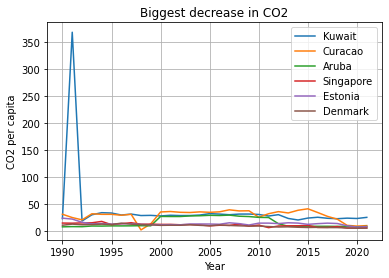

In [ ]:
# plotting the top five countries in one plot
fig, ax = plt.subplots()

years = df_top_five_countries.columns[1:]

for index, row in df_top_five_countries.iterrows():
  plt.plot(years, row[1:], label=row['country'])

plt.xlabel('Year')
plt.ylabel('CO2 per capita')
plt.title('Biggest decrease in CO2')
plt.legend()#(loc='center left', bbox_to_anchor=(0.7, 0.5))
plt.grid()

plt.show()

In [ ]:
# top five (excluding Kuwait)
top_five_countries = [cur, aru, sin, est, den]
df_top_five_countries = pd.concat(top_five_countries)
df_top_five_countries

year,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Curacao,30.768,24.620,20.368,31.645,30.597,30.580,28.922,30.636,1.713,...,35.599,33.123,38.137,40.834,33.968,26.784,21.540,10.150,8.841,9.686
0,Aruba,7.413,7.827,7.671,8.961,8.825,9.175,9.133,9.264,9.555,...,13.203,8.368,8.417,8.609,8.419,8.443,8.228,8.570,7.307,8.054
0,Singapore,14.405,14.175,14.696,14.895,17.474,11.441,13.147,15.087,12.263,...,8.981,9.288,9.380,9.994,6.242,6.446,7.915,5.100,5.061,5.472
0,Estonia,23.507,21.805,15.855,12.922,13.584,12.436,13.273,13.144,12.006,...,13.454,14.945,14.348,12.054,13.344,14.240,13.565,9.329,7.028,7.864
0,Denmark,10.416,12.446,11.282,11.675,12.409,11.769,14.244,12.406,11.557,...,7.119,7.426,6.650,6.205,6.489,6.062,6.022,5.341,4.855,5.052


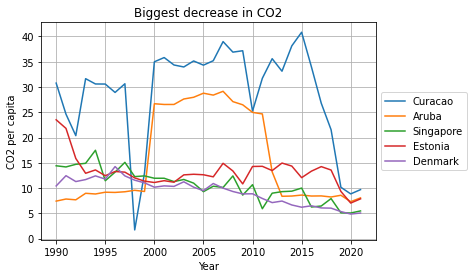

In [ ]:
# plotting the top five countries in one plot
fig, ax = plt.subplots()

years = df_top_five_countries.columns[1:]

for index, row in df_top_five_countries.iterrows():
  plt.plot(years, row[1:], label=row['country'])

plt.xlabel('Year')
plt.ylabel('CO2 per capita')
plt.title('Biggest decrease in CO2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

plt.show()